In [1]:
!pip install opencv-python

In [2]:
import os
from os import listdir
import PIL.Image as pilimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

## - Load data
- Dataset: http://sintel.is.tue.mpg.de/downloads

In [3]:
folder_dir = "./MPI-Sintel-testing/test/clean/temple_1"
end = (".png", ".jpg")

In [4]:
file_name_list = os.listdir(folder_dir)

## - Sort images in time order

In [5]:
file_name_list.sort()
print(file_name_list)

['frame_0001.png', 'frame_0002.png', 'frame_0003.png', 'frame_0004.png', 'frame_0005.png', 'frame_0006.png', 'frame_0007.png', 'frame_0008.png', 'frame_0009.png', 'frame_0010.png', 'frame_0011.png', 'frame_0012.png', 'frame_0013.png', 'frame_0014.png', 'frame_0015.png', 'frame_0016.png', 'frame_0017.png', 'frame_0018.png', 'frame_0019.png', 'frame_0020.png', 'frame_0021.png', 'frame_0022.png', 'frame_0023.png', 'frame_0024.png', 'frame_0025.png', 'frame_0026.png', 'frame_0027.png', 'frame_0028.png', 'frame_0029.png', 'frame_0030.png', 'frame_0031.png', 'frame_0032.png', 'frame_0033.png', 'frame_0034.png', 'frame_0035.png', 'frame_0036.png', 'frame_0037.png', 'frame_0038.png', 'frame_0039.png', 'frame_0040.png', 'frame_0041.png', 'frame_0042.png', 'frame_0043.png', 'frame_0044.png', 'frame_0045.png', 'frame_0046.png', 'frame_0047.png', 'frame_0048.png', 'frame_0049.png', 'frame_0050.png']


## - Parameters for ShiTomasi corner detection

In [6]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

## - Parameters for lucas kanade optical flow

In [7]:
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

## - Lucas-Kanade static optical flow 

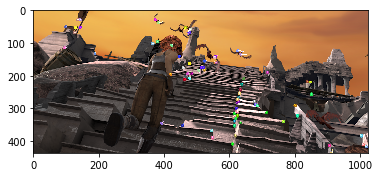

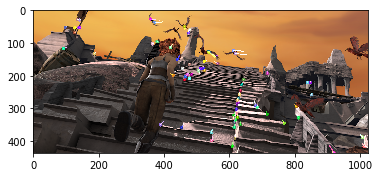

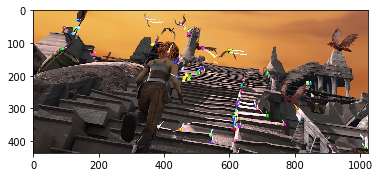

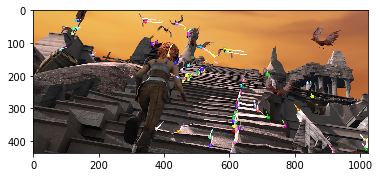

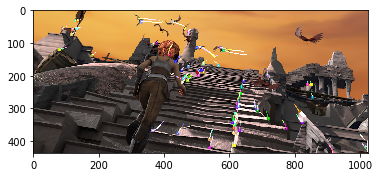

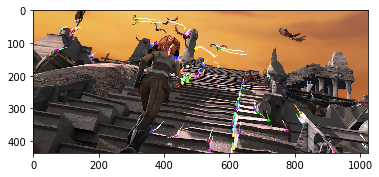

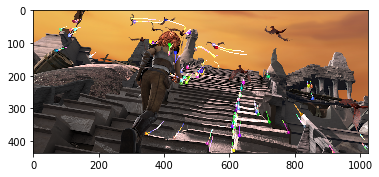

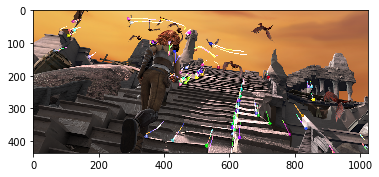

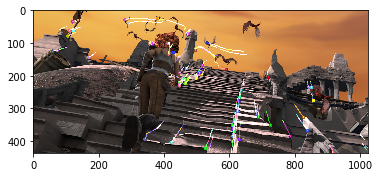

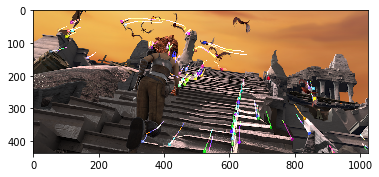

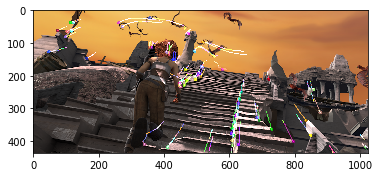

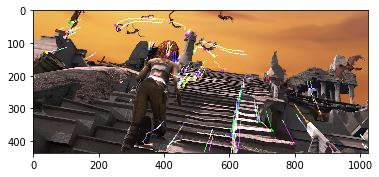

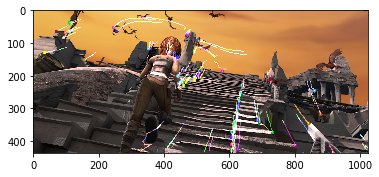

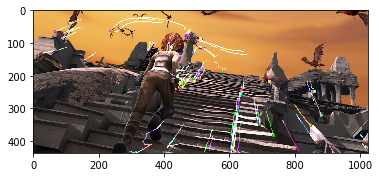

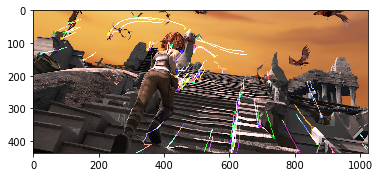

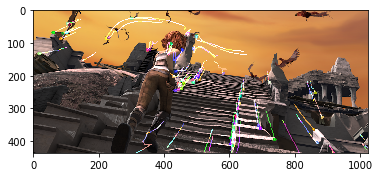

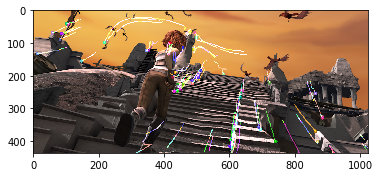

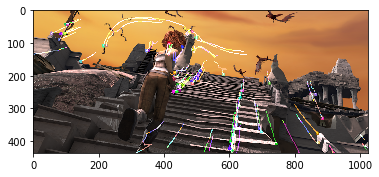

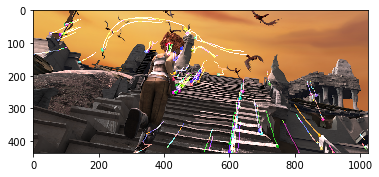

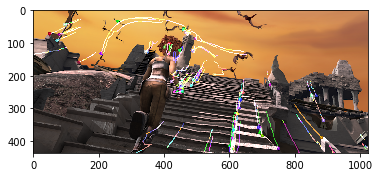

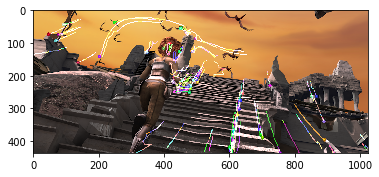

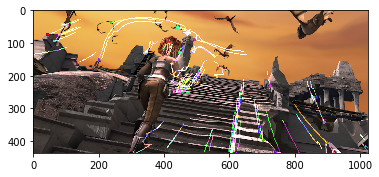

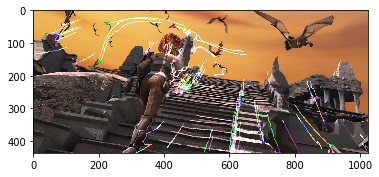

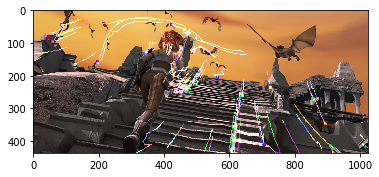

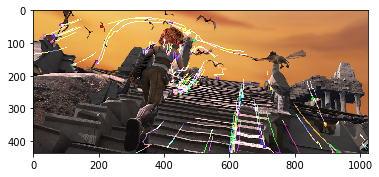

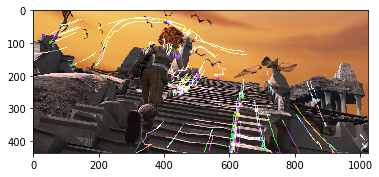

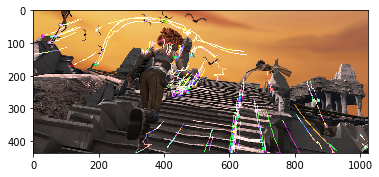

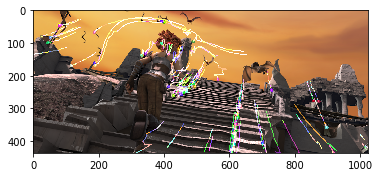

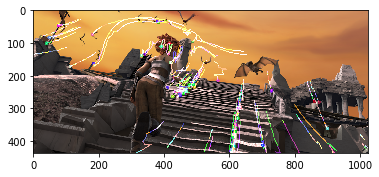

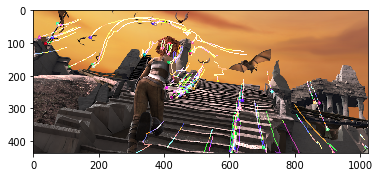

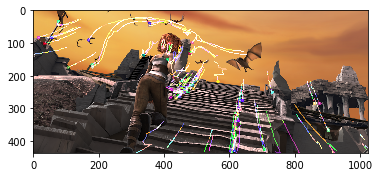

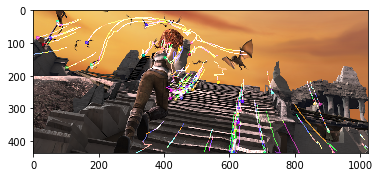

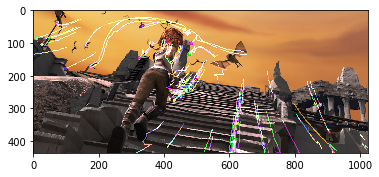

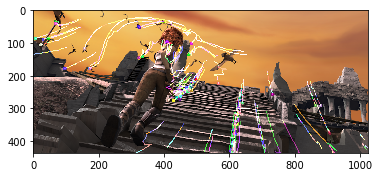

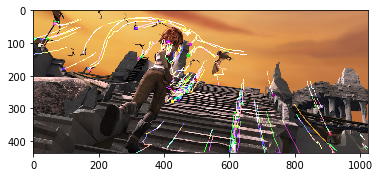

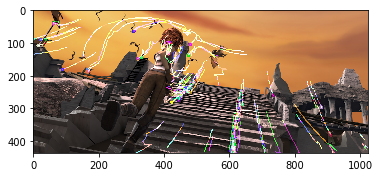

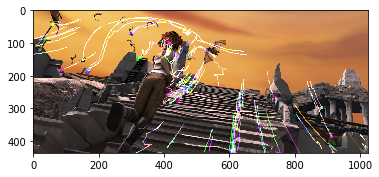

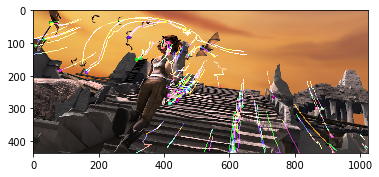

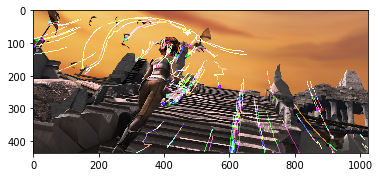

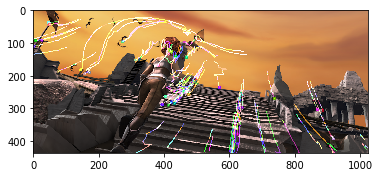

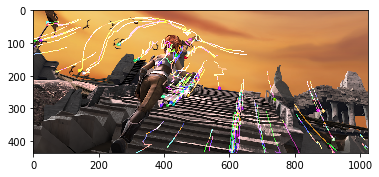

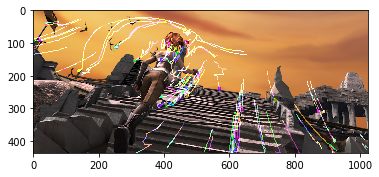

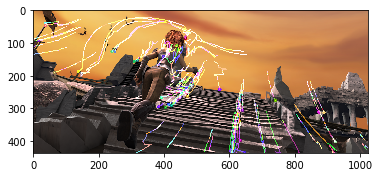

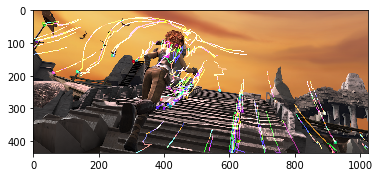

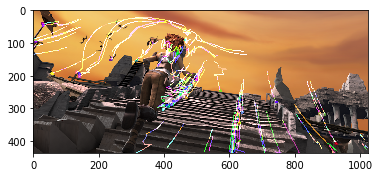

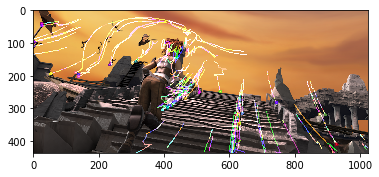

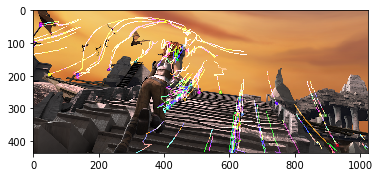

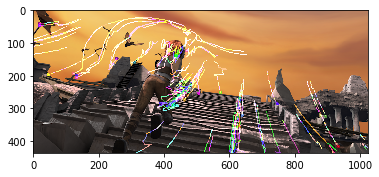

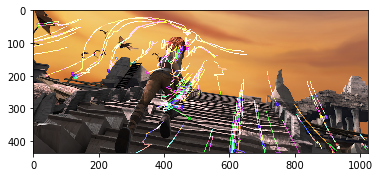

In [8]:
for i, file_name in enumerate(file_name_list):
 
    if (file_name.endswith(end)):
        img_path = os.path.join(folder_dir, file_name)
        
        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Gray scale
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Show raw image
        #plt.imshow(img, interpolation='nearest')
        #plt.show()
        
        if i == 0:
           
            # Take first frame and find corners in it 
            # (points, 1, 2)
            p0 = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
            
            # Create a mask image for drawing purposes
            mask = np.zeros_like(img)
            
            # Create some random colors
            color = np.random.randint(0, 255, (100, 3))
        
        elif i > 0:
            
            # Calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(prev_img_gray, img_gray, p0, None, **lk_params)
            
            # Select good points
            if p1 is not None:
                good_new = p1[st==1]
                good_old = p0[st==1]

            # Draw the tracks
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                img = cv2.circle(img, (int(a), int(b)), 5, color[i].tolist(), -1)
            img = cv2.add(img, mask)

            # Show result image
            plt.imshow(img, interpolation='nearest')
            plt.show()            
            
            # Update
            p0 = good_new.reshape(-1, 1, 2)

        prev_img_gray = copy.deepcopy(img_gray)